<a href="https://colab.research.google.com/github/varshini2809/ML/blob/main/Food_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Food_Preference.csv")
df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [ ]:
df.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [ ]:
df.shape

(288, 8)

In [ ]:
df.describe()

,Age
count,288.000000
mean,30.597222
std,11.180383
min,8.000000
25%,24.000000
50%,28.000000
75%,36.250000
max,80.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       288 non-null    object
 1   Participant_ID  288 non-null    object
 2   Gender          284 non-null    object
 3   Nationality     288 non-null    object
 4   Age             288 non-null    int64 
 5   Food            288 non-null    object
 6   Juice           288 non-null    object
 7   Dessert         288 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.1+ KB


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(['Timestamp',],axis=1,inplace=True)
df.head()

,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [ ]:
avg_norm_loss= df["Age"].astype("float").mean(axis=0)
print(avg_norm_loss)

30.59722222222222


In [ ]:
df["Age"].replace(np.nan,avg_norm_loss,inplace=True)


In [ ]:
door_mode=df["Gender"].mode()

In [ ]:
df["Gender"].replace(np.nan,door_mode[0],inplace=True)

In [ ]:
df.dropna(subset=['Gender'],axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [ ]:
df.dtypes

Participant_ID    object
Gender            object
Nationality       object
Age                int64
Food              object
Juice             object
Dessert           object
dtype: object

In [ ]:
from scipy import stats
a=np.abs(stats.zscore(df['Age']))
a

0      0.591098
1      0.770294
2      0.036088
3      0.501500
4      0.322304
         ...   
283    0.322304
284    0.591098
285    0.501500
286    0.322304
287    0.322304
Name: Age, Length: 288, dtype: float64

In [ ]:
df['Age']

0      24
1      22
2      31
3      25
4      27
       ..
283    27
284    24
285    25
286    27
287    27
Name: Age, Length: 288, dtype: int64

In [ ]:
threshold=a.max()
b=np.where(a >= threshold)
df.iloc[b]["Age"]

69    80
73    80
Name: Age, dtype: int64

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
group=df[['Juice','Food']]
group

,Juice,Food
0,Fresh Juice,Traditional food
1,Carbonated drinks,Western Food
2,Fresh Juice,Western Food
3,Fresh Juice,Traditional food
4,Fresh Juice,Traditional food
...,...,...
283,Fresh Juice,Western Food
284,Fresh Juice,Traditional food
285,Fresh Juice,Traditional food
286,Fresh Juice,Traditional food


In [ ]:
import matplotlib.pyplot as plt


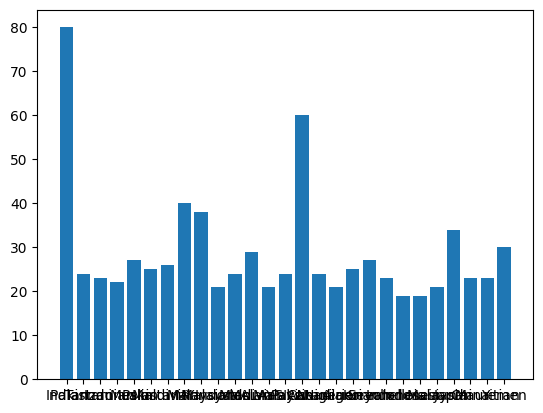

In [ ]:
x=df['Nationality']
y=df['Age']

plt.bar(x,y)
plt.show()

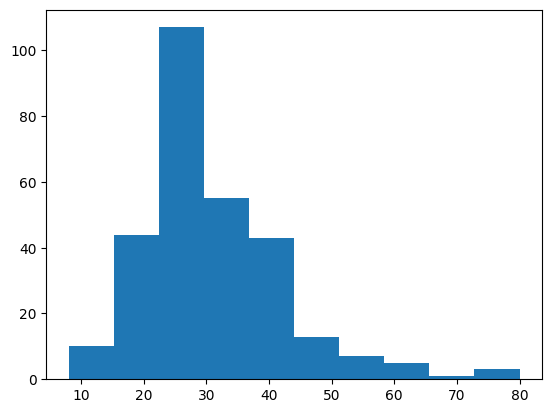

In [ ]:
x=df['Age']
plt.hist(x)
plt.show()

<Axes: >

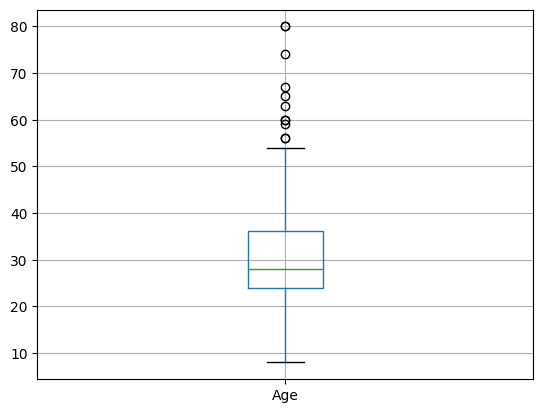

In [ ]:
df.boxplot('Age')